In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Importing Data

In [2]:
anime = pd.read_csv('/Users/britfathi/Downloads/anime.csv')

In [3]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


In [4]:
anime.score.unique()

array([7.63, 7.89, 7.55, 8.21, 8.67, 8.03, 7.26, 7.72, 8.24, 8.34, 8.15,
       8.2 , 8.23, 7.71, 7.9 , 7.53, 8.13, 8.18, 7.85, 8.39, 8.49, 7.77,
       8.47, 7.68, 8.29, 7.7 , 8.02, 7.87, 8.33, 7.1 , 7.73, 8.04, 8.54,
       7.64, 8.16, 6.3 , 7.92, 8.32, 8.41, 8.14, 7.78, 8.12, 8.07, 6.49,
       7.99, 7.4 , 6.04, 3.44, 7.14, 6.15, 7.35, 7.42, 4.32, 5.91, 8.01,
       6.86, 6.41, 5.73, 5.2 , 6.65, 5.92, 5.63, 6.54, 6.95, 6.93, 7.13,
       7.47, 7.57, 6.03, 5.81, 7.88, 7.5 , 6.47, 7.17, 7.69, 8.85, 6.06,
       7.27, 6.66, 7.36, 6.28, 6.05, 7.94, 7.12, 5.97, 7.2 , 6.84, 7.01,
       6.82, 7.56, 6.78, 6.57, 7.  , 5.43, 8.08, 5.09, 6.85, 7.18, 5.66,
       5.62, 6.87, 5.72, 6.72, 7.04, 5.58, 6.9 , 6.71, 7.96, 7.37, 6.91,
       7.05, 7.61, 6.51, 6.36, 5.  , 6.07, 5.7 , 6.97, 5.36, 7.22, 6.09,
       5.55, 5.75, 7.51, 7.98, 7.33, 5.95, 6.88, 7.49, 7.03, 7.84, 7.34,
       7.3 , 7.93, 4.85, 7.82, 6.01, 6.02, 5.13, 6.08, 4.42, 5.8 , 6.68,
       8.09, 7.29, 4.54, 7.16, 8.87, 7.25, 7.48, 5.

## Analyzing if a Rating Score of 6.2 is Different from the Mean of this Dataset

### Testing if Normally Distributed

<Axes: >

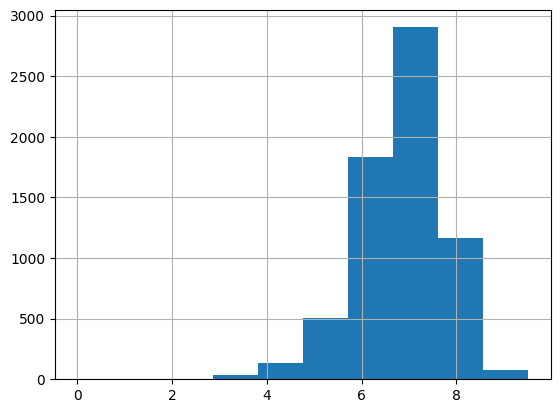

In [5]:
anime['score'].hist()

#### Close enough to being normally distributed (and we didn't cover that in Lesson 1)

## Run the Analysis

In [6]:
stats.ttest_1samp(anime['score'], 6.2)

TtestResult(statistic=57.14153988539698, pvalue=0.0, df=6667)

##### There is a significant difference between the actual mean and 6.2. 

In [7]:
anime.score.mean()

6.848998200359928

##### 6.849 is higher than the assumed mean of 6.2, which is statistically significant. Actually significant???

## Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

In [8]:
anime.status.unique()


array(['Finished Airing', 'Currently Airing'], dtype=object)

<Axes: >

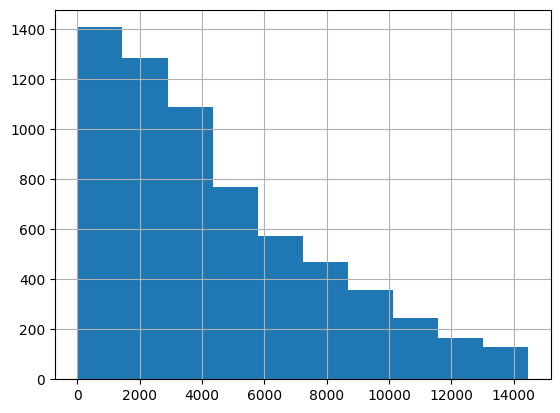

In [9]:
anime.popularity[anime.status =='Finished Airing'].hist()

<Axes: >

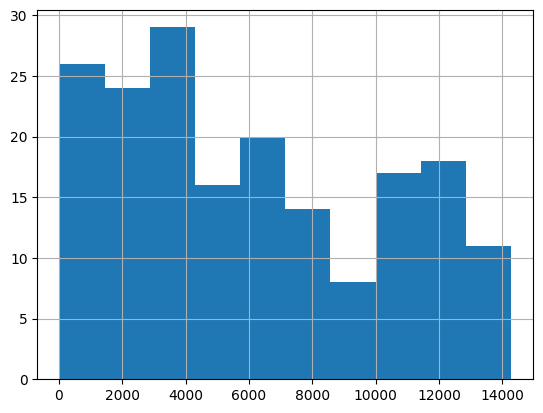

In [10]:
anime.popularity[anime.status =='Currently Airing'].hist()

### Neither of these are normal, as per usual, but that is not this lesson. Moving on... 

## Run the Analysis

In [11]:
ttest_ind(anime.popularity[anime.status =='Finished Airing'], anime.popularity[anime.status =='Currently Airing'])

Ttest_indResult(statistic=-6.489071311277514, pvalue=9.256789141747445e-11)

#### Yes, they differ in popularity. How different?

In [12]:
anime.groupby('status')['popularity'].mean()

status
Currently Airing    6108.131148
Finished Airing     4433.558057
Name: popularity, dtype: float64

#### That's almost a 2000 point difference between the two. 

## Does the Source of the Anime Influence the Type of Anime?

In [ ]:
#checking for recoding

In [13]:
anime.source.unique()

array(['Manga', 'Original', 'Light novel', '4-koma manga', 'Novel',
       'Visual novel', 'Other', 'Game', 'Picture book', 'Card game',
       'Web manga', 'Book', 'Music', 'Radio', 'Digital manga'],
      dtype=object)

In [14]:
anime.source.value_counts()


Manga            2493
Original         1789
Light novel       512
Visual novel      482
Game              424
Novel             282
4-koma manga      194
Other             170
Web manga         111
Music              55
Picture book       53
Card game          46
Book               45
Digital manga       7
Radio               5
Name: source, dtype: int64

In [23]:
#Recoding for only having 4 types (list based on research)

In [24]:
def Rsource(series):
    if series == 'Original':
        return 'Manga'
    elif series == '4-koma manga':
        return 'Manga'
    elif series == 'Other':
        return 'Manga'
    elif series == 'Picture book':
        return 'Manga'
    elif series == 'Digital manga':
        return 'Manga'
    elif series == 'Web manga':
        return 'Manga'
    elif series == 'Light novel':
        return 'Book'
    elif series == 'Novel':
        return 'Book'
    elif series == 'Visual novel':
        return 'Book'
    elif series == 'Card game':
        return 'Game'
    elif series == 'Music':
        return 'Listening'
    elif series == 'Radio':
        return 'Listening'
    else: 
        return series

In [20]:
anime['source'] = anime['source'].apply(Rsource)

In [21]:
anime.source.value_counts()

Manga        4817
Book         1321
Game          470
Listening      60
Name: source, dtype: int64

In [22]:
anime.source.unique()

array(['Manga', 'Book', 'Game', 'Listening'], dtype=object)

In [25]:
#Now that it's recoded with only 4 categories, we can now answer the question "Does the source influence the type?"

In [26]:
crosstab = pd.crosstab(anime['source'], anime['type'])

In [27]:
crosstab

type,Movie,Music,ONA,OVA,Special,TV
source,,,,,,
Book,151,1,57,388,172,552
Game,83,9,39,57,72,210
Listening,2,42,0,1,1,14
Manga,672,46,312,899,684,2204


In [28]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=2078.881045375597, pvalue=0.0, dof=15, expected_freq=array([[1.79884223e+02, 1.94148170e+01, 8.08290342e+01, 2.66458458e+02,
        1.84044541e+02, 5.90368926e+02],
       [6.40011998e+01, 6.90761848e+00, 2.87582484e+01, 9.48035393e+01,
        6.54814037e+01, 2.10047990e+02],
       [8.17036593e+00, 8.81823635e-01, 3.67126575e+00, 1.21025795e+01,
        8.35932813e+00, 2.68146371e+01],
       [6.55944211e+02, 7.07957409e+01, 2.94741452e+02, 9.71635423e+02,
        6.71114727e+02, 2.15276845e+03]]))

In [29]:
#There is an influence of the source on type, however it does not meet the assumption of 5 cases per cell (which we ignore for now)


## How do the Variables about Popularity / Ranking Relate to Each Other?

In [31]:
#I think it's easier just to see the heatmap in the first place. 

/var/folders/t5/4lqy4g_n1z14zq1k52ld2cx00000gn/T/ipykernel_64530/2390596655.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(anime.corr(), annot=True)


<Axes: >

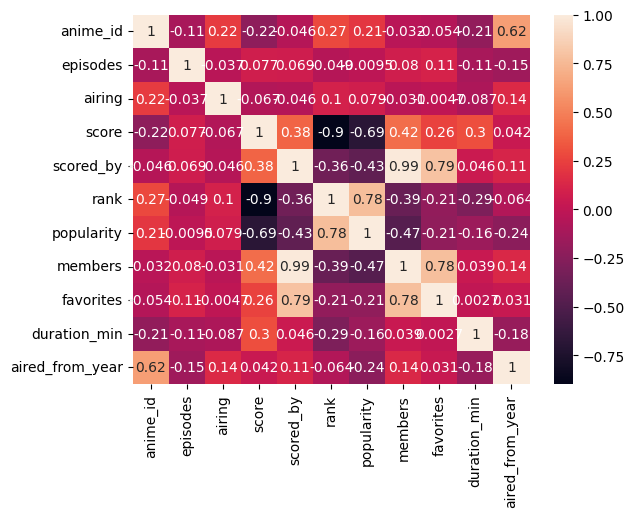

In [32]:
sns.heatmap(anime.corr(), annot=True)

In [35]:
#From this heatmap, I see that Rank and Score have a strong negative correlation of -.9
#Popularity and Rank have a moderate positive correlation of .78
#Members and Scored_by have a strong positive correlation of .99
#Popularity and Score have a weak to moderate negative correlation of -.69
#Members and Favorites have a moderate poositive correlation of .79

In [36]:
anime['rank'].corr(anime['score'])

-0.89874685889926

In [37]:
anime['rank'].corr(anime['popularity'])

0.7773024303272644

In [39]:
anime['members'].corr(anime['scored_by'])

0.9871065651785598

In [38]:
anime['popularity'].corr(anime['score'])

-0.6884918226602826

In [40]:
anime['members'].corr(anime['favorites'])

0.7815649735370248